In [3]:
!pip install joypy

In [79]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import seaborn as sns
import numpy as np
from joypy import joyplot

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import pandas as pd
# path='/Users/nikli/Documents/git_reps/Data/Spotify/'
path='/Users/irak/Documents/py_viz/spotify/'

In [82]:
data=pd.read_csv(path+'data.csv')
data_by_artist=pd.read_csv(path+'data_by_artist.csv')
data_by_genres=pd.read_csv(path+'data_by_genres.csv')
data_by_year=pd.read_csv(path+'data_by_year.csv')
data_w_genres=pd.read_csv(path+'data_w_genres.csv')


Источник: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Описание датасета:
 "data.csv" файл, окторый состоит из 150к песен, которые были скачаны с помощью Spotify API. Так же можно заметить датасеты треков, сгрупированных по: артистам, по дате , по жанру или по годам.



In [8]:
display(data.head())
display(data_by_artist.head())
display(data_by_genres.head())
display(data_by_year.head())
display(data_w_genres.head())


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [9]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [10]:
data.shape

(174389, 19)

In [83]:
data['minutes']=(data['duration_ms']/(1000*60))%60

In [12]:
print(min(data['year']))
print(max(data['year']))

1920
2021


In [84]:
data['decade'] = (data['year']//10)*10

In [85]:
#  выношу числовые колонки и категориальнве в отдельные
numcols = data[['id', 'acousticness', 'danceability', 'minutes','energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'year']]
catcols = data[['id', 'artists', 'name', 'explicit', 'mode', 'key']]

In [8]:
len(data['id'].unique()) #  неужели ид есть с повторами?

172230

In [16]:
data['id'].duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
174384     True
174385    False
174386     True
174387    False
174388     True
Name: id, Length: 174389, dtype: bool

In [86]:
cmp = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) 

### Посмотрим на распределения признаов:
1. acousticness - позитивность песни
2. danceability - танцевальность песни
3. instrumentalness - инструментальность ( бинарный признак! 
Я бы этот признак отнёс к категориальным а не к числовым 
4. liveness - Относительное соотношение инструментального трека
5. popularity - популярность трека
6. speechiness - относительная громкость трка
7. valence - мера позитивности 

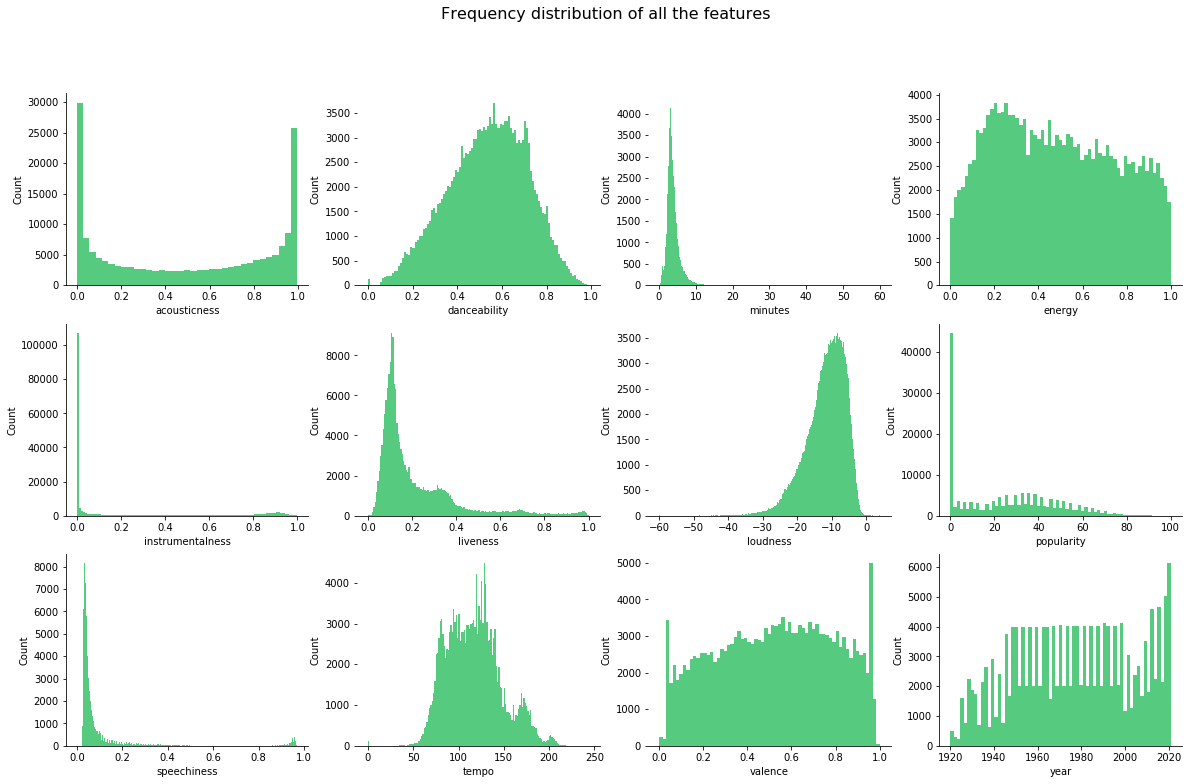

In [89]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
ro = 0
co = 0
for col in numcols.iloc[:,1:13].columns:
    sns.histplot(ax=axes[ro, co], data=numcols.iloc[:,1:], x=col, color='#1DB954', linewidth=0)
    axes[ro, co].spines['right'].set_visible(False)
    axes[ro, co].spines['top'].set_visible(False)
    if co == 1:
        axes[ro, co].spines['left'].set_visible(False)
    elif co == 2:
        axes[ro, co].spines['left'].set_visible(False)
    co += 1
    if co == 4:
        ro += 1
        co = 0
plt.suptitle('Frequency distribution of all the features', size=16);

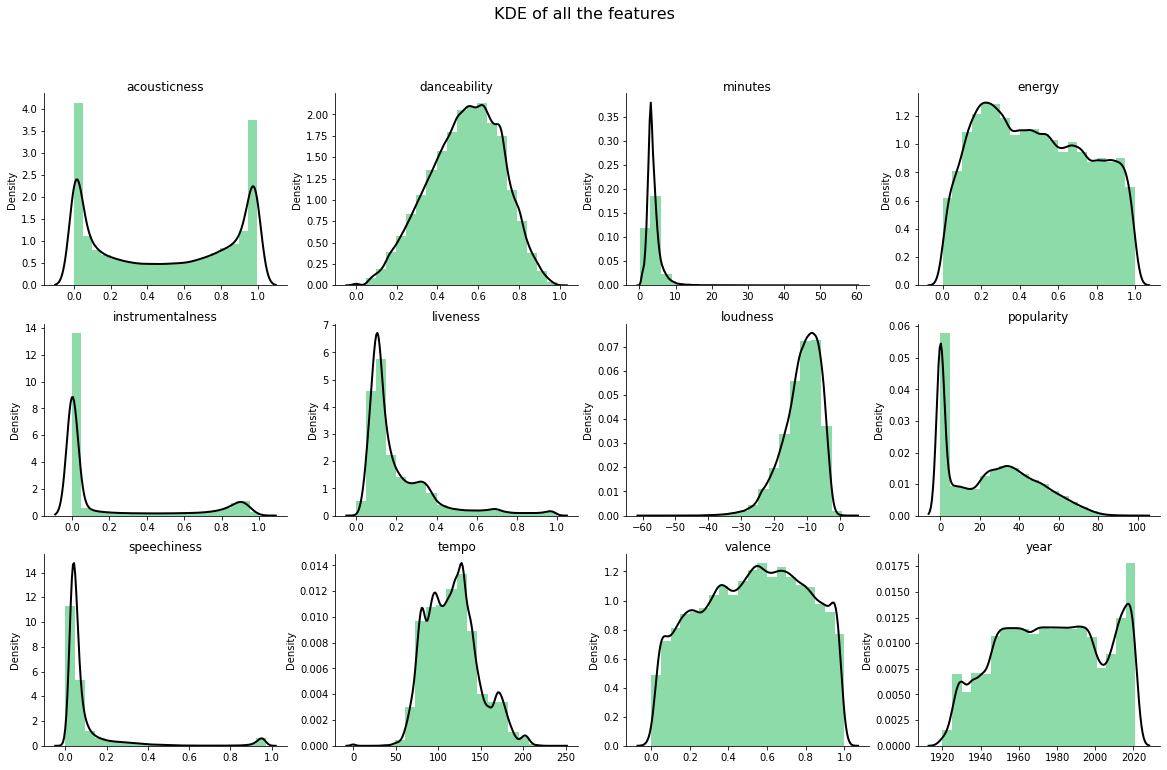

In [88]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
ro = 0
co = 0
for col in numcols.iloc[:,1:13].columns:
#     sns.kdeplot(ax=axes[ro, co], data=numcols.iloc[:,1:], x=col, color=cmp.colors[170])
    sns.distplot(ax=axes[ro, co], 
                 x=numcols.iloc[:,1:][col], 
                 bins=20, 
                 kde=True, 
                 color="#1DB954", 
                 kde_kws=dict(linewidth = 2, color = 'black'), 
                 hist_kws=dict(alpha=0.5))
    axes[ro, co].set_title(col, pad = 2)
    co += 1
    if co == 4:
        ro += 1
        co = 0
sns.despine()
plt.suptitle('KDE of all the features', size=16);
# нагладили так, что появились значения там, где их нет, если использовать displot то это уйдет

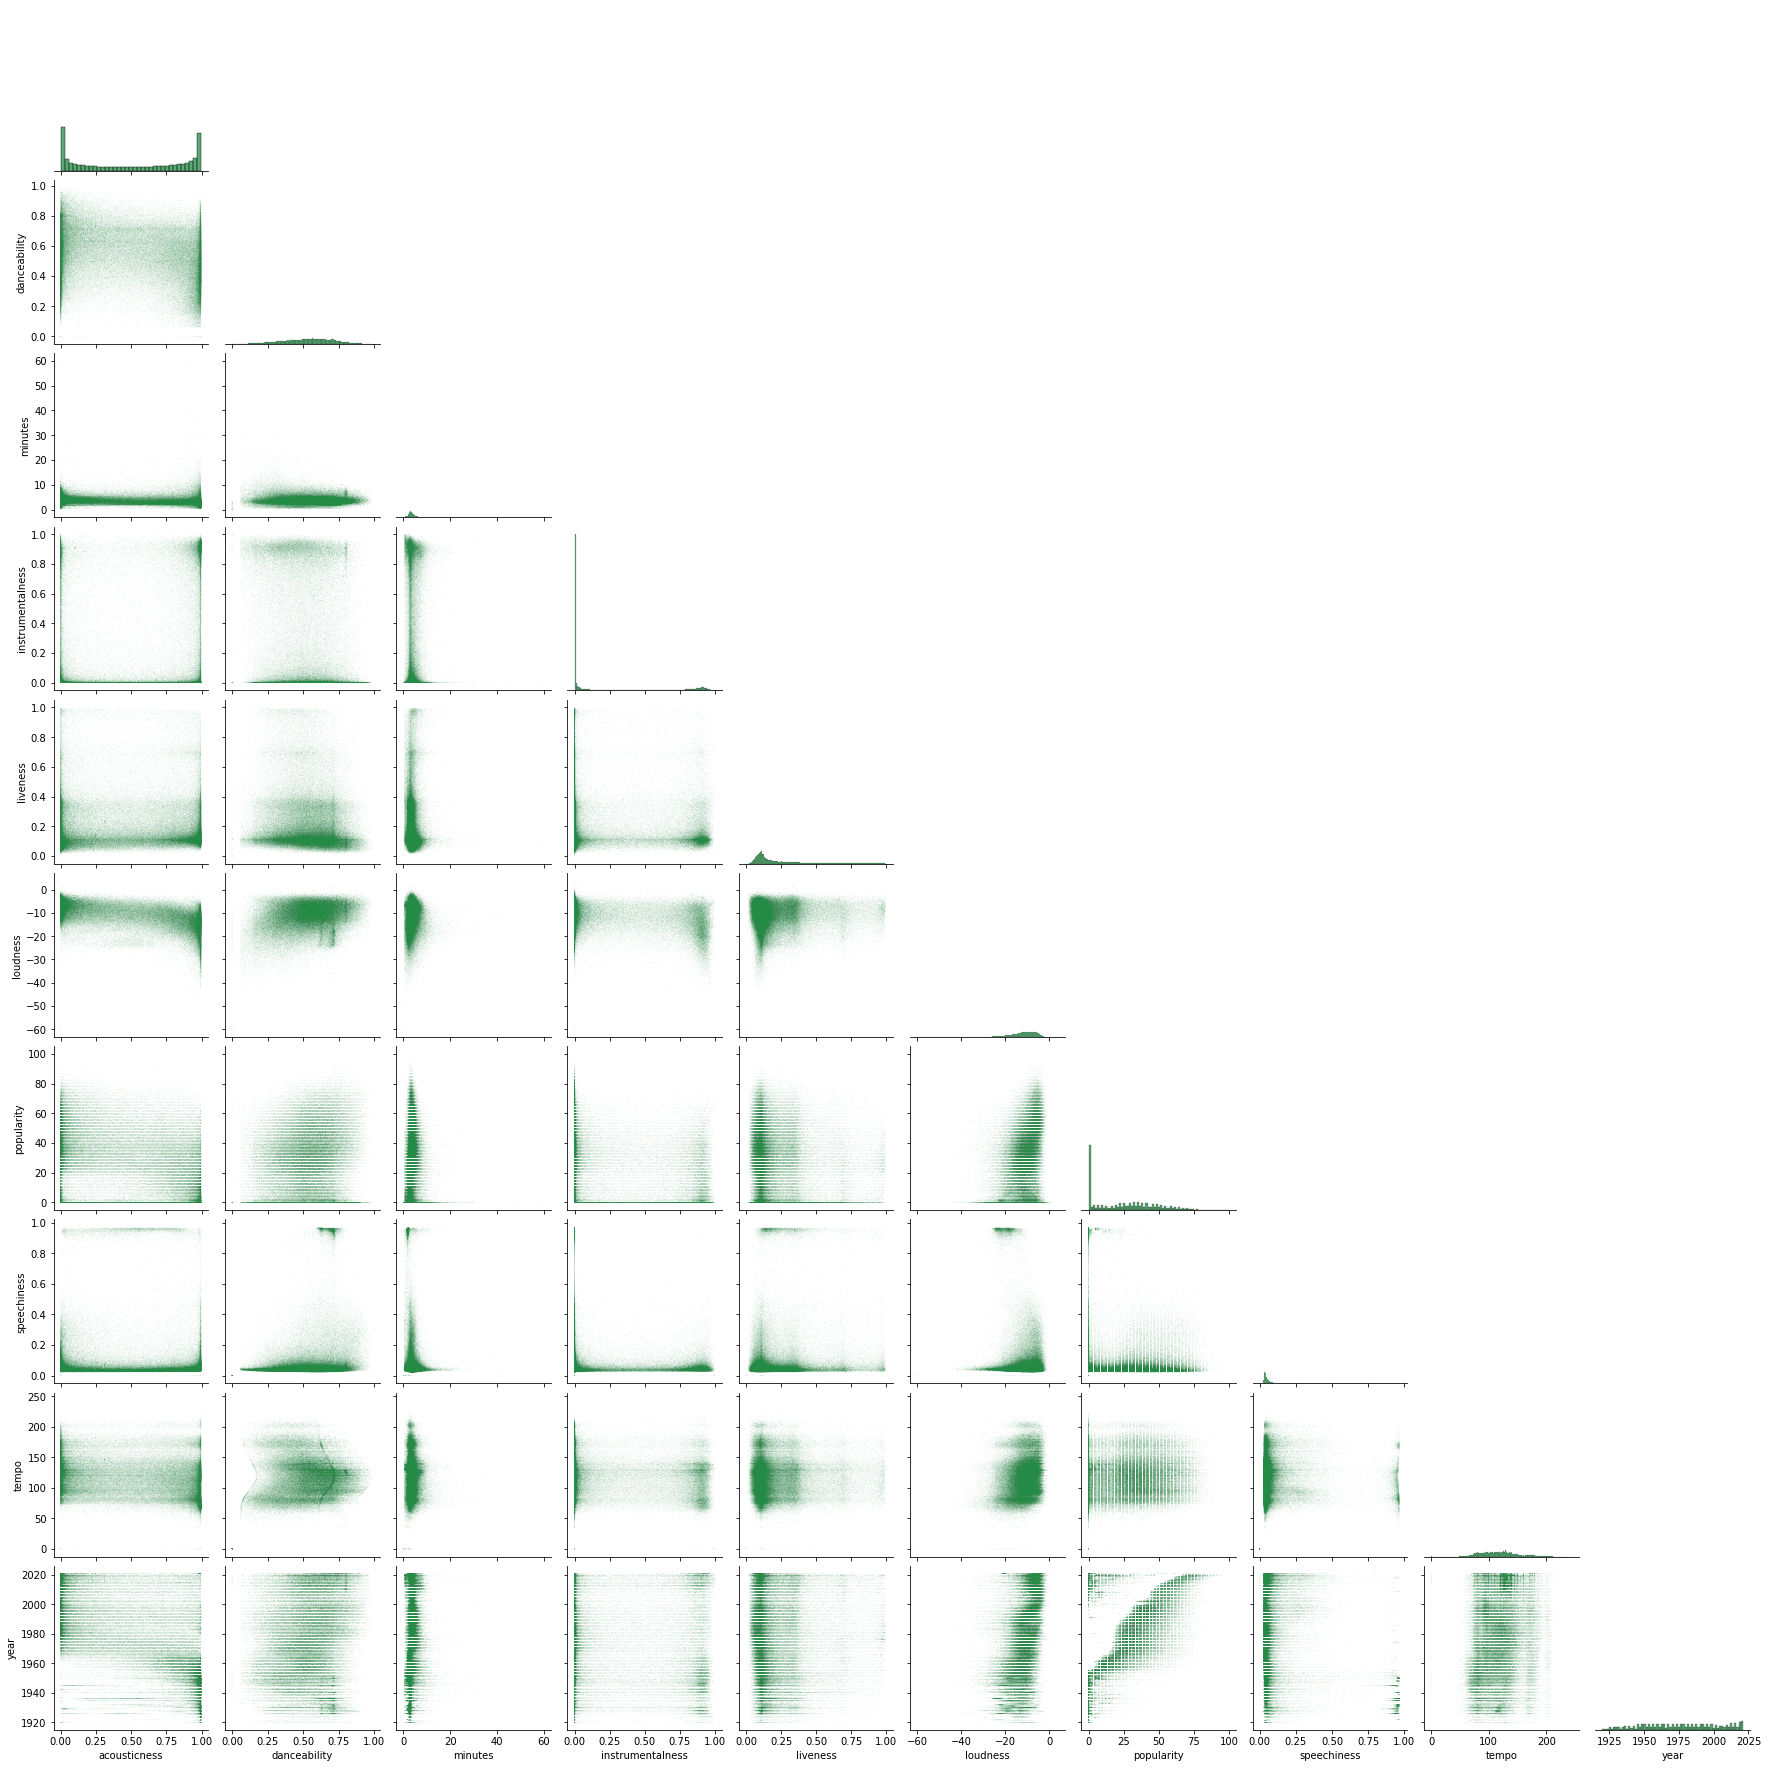

In [124]:
sns.pairplot(numcols, vars=['acousticness', 'danceability', 'minutes', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'year'],
            corner=True,
            plot_kws={'s':0.1, 'edgecolor':'none', 'alpha': 0.3, 'color':'#238b45'},
            diag_kws={'color':'#238b45'})

### Посмотрим на график количества песен в зависимости от года.

Видно , что общее число песен у нас росло равномерно

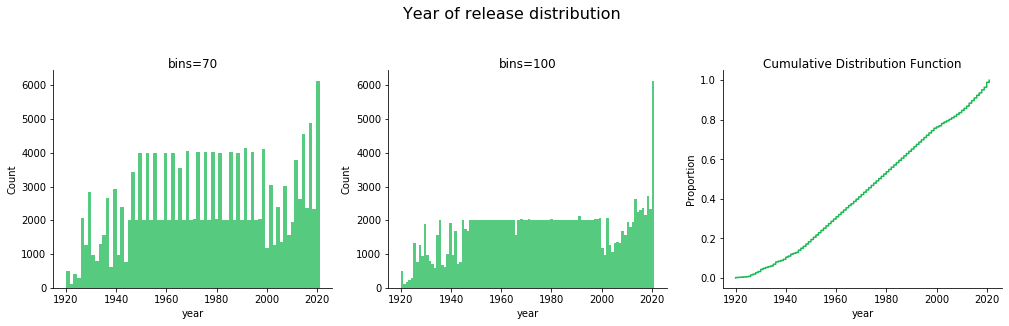

In [90]:
# год странный и мне интересно что там
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
sns.histplot(data['year'], color='#1DB954', linewidth=0, bins=70, ax=axes[0])
axes[0].set_title("bins=70", pad = 2)
sns.histplot(data['year'], color='#1DB954', linewidth=0, bins=100, ax=axes[1])
axes[1].set_title("bins=100", pad = 2)
sns.ecdfplot(x=data['year'], color='#1DB954', ax=axes[2])
axes[2].set_title("Cumulative Distribution Function", pad = 2)

plt.suptitle('Year of release distribution', size=16, y=1.1);
sns.despine()

In [38]:
#[print(i) for i in data['year'].value_counts()];

## Топ 10 популярных песен.

In [22]:
data[['artists', 'name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,artists,name,popularity
20062,['Olivia Rodrigo'],drivers license,100
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19866,['Ariana Grande'],positions,96
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,['KAROL G'],BICHOTA,95
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
19872,['The Kid LAROI'],WITHOUT YOU,94
19876,['Billie Eilish'],Therefore I Am,94
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94


Среди них повторяются Ariana Grande и Bad Bunny

#### Посмотрим на распределение категориальных признаков:
1. explicit (0 = No explicit content, 1 = Explicit content)
2. mode - (0 = Minor, 1 = Major)
3. key (Все ключи песни разбитые в диапозоне от 0 до 11, начиная с  C(до(=) как 0, C#(до диез/ ре минор) как 1 и т.д…)

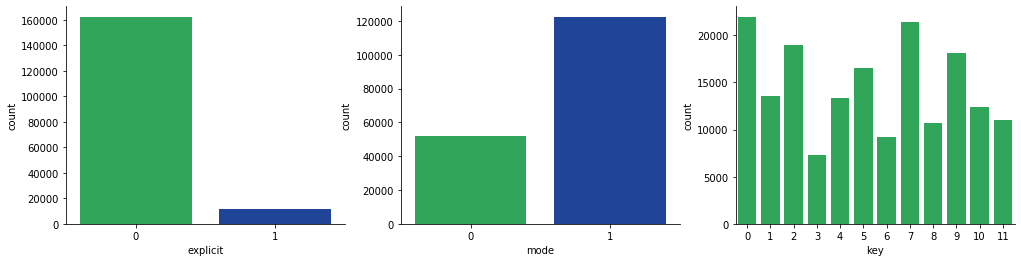

In [92]:
colors_01 = {
    0:'#1DB954',
    1:'#0c3cac'
}
fig2, axes2 = plt.subplots(1, 3, figsize=(17, 4))
sns.countplot(ax=axes2[0], data=catcols.iloc[:,1:], x = 'explicit', palette=colors_01)
sns.countplot(ax=axes2[1], data=catcols.iloc[:,1:], x = 'mode', palette=colors_01)
sns.countplot(ax=axes2[2], data=catcols.iloc[:,1:], x = 'key', color="#1DB954")
sns.despine()

In [26]:
# самые плодовитые исполнители
artists_count = pd.DataFrame(data['artists'].value_counts())
# 3 лидерa - книжки))
artists_count.head(10)

,artists
['Tadeusz Dolega Mostowicz'],1281
['Эрнест Хемингуэй'],1175
['Эрих Мария Ремарк'],1062
['Francisco Canaro'],951
['Ignacio Corsini'],624
['Frank Sinatra'],621
['Elvis Presley'],494
['Bob Dylan'],459
['Johnny Cash'],456
"['Francisco Canaro', 'Charlo']",456


In [59]:
# самые частые названия песен
title_count = pd.DataFrame(data['name'].value_counts())
title_count.head(10)
# угар
# White Christmas слишко расисткое какое-то;dd

,name
White Christmas,103
Winter Wonderland,88
Silent Night,81
Jingle Bells,71
2000 Years,70
Happy New Year,57
Sleigh Ride,54
Summertime,53
The Christmas Song,51
Silver Bells,51


In [99]:
# создаю палетки
# bottom = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "#fd8d3c", "#a63603"]) # orange
bottom = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", '#77d598', '#1db954']) # green
top = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0c3cac', '#5476c4', "white"]) # blue


newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='PurpleOranges2')

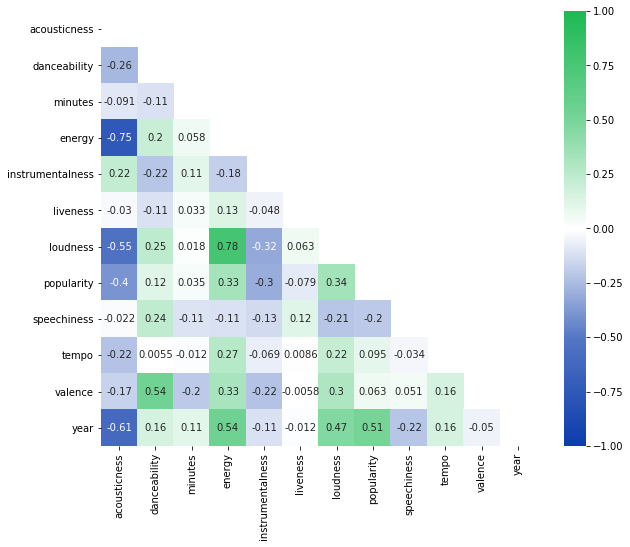

In [100]:
fig, ax = plt.subplots(figsize=(10,8))   
corr = numcols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap_hmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
# cmap=sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1, cmap=newcmp, cbar=True, square=True, ax=ax)

### По этой матрице корреляции видно, что с каждым годом громкость растёт так же растёт. Помимо громкости , песни становятся более энергичными. Становится всё меньше аккустики. Так же старые песни терятют свою популярность и на их место приходят новые. 

На самом деле не все знают, но зависимость популярности трека от его громкости заметили очень давно и поэтому все медиаплощадки (и ютуб тоже входит в их список) приняли политику в ограничении громкости трека.

#### Посмотрим на статистику с шагом в 10 лет

In [24]:
decade = data[['acousticness', 'danceability', 'minutes','energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'decade']]
decade.sort_values(by='decade', ascending=True)

,acousticness,danceability,minutes,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,decade
0,0.991000,0.598,2.805550,0.224,0.000522,0.379,-12.628,12,0.0936,149.976,0.634,1920
40151,0.061400,0.731,2.784767,0.180,0.000000,0.127,-19.498,0,0.9090,87.284,0.716,1920
40150,0.055400,0.624,3.313417,0.271,0.000000,0.226,-18.187,0,0.9500,74.759,0.646,1920
40149,0.995000,0.376,3.177117,0.253,0.868000,0.179,-12.289,0,0.0597,207.846,0.861,1920
40148,0.992000,0.734,2.991550,0.265,0.832000,0.236,-9.497,0,0.2100,116.547,0.575,1920
...,...,...,...,...,...,...,...,...,...,...,...,...
143179,0.316000,0.741,4.616000,0.610,0.000000,0.534,-7.340,0,0.0511,125.990,0.720,2020
143180,0.000579,0.695,3.995117,0.750,0.040100,0.125,-7.328,10,0.0297,115.992,0.655,2020
143181,0.694000,0.531,3.870667,0.419,0.000000,0.120,-8.122,0,0.3180,120.142,0.317,2020
143173,0.316000,0.741,4.616000,0.610,0.000000,0.534,-7.340,0,0.0511,125.990,0.720,2020


In [25]:
# средние значения каждого свойства по десятилетиям
decades_means = pd.DataFrame(columns=[str(i) for i in decade['decade'].sort_values(ascending=True).unique()])
dec = []
for i in decade['decade'].sort_values(ascending=True).unique():
    for j in decade.columns:
        dec.append(decade[decade['decade'] == i][j].mean())
    decades_means[str(i)] = dec 
    dec = []

In [26]:
decades_means.index = decade.columns

In [66]:
decades_means

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
acousticness,0.792778,0.816473,0.872075,0.838657,0.630583,0.403053,0.307810,0.319077,0.270266,0.229972,0.243684
danceability,0.585578,0.559221,0.473930,0.478492,0.492195,0.524642,0.544783,0.564811,0.566726,0.585211,0.619445
minutes,3.095639,3.300767,3.629249,3.653498,3.507785,4.219347,4.176691,4.118137,3.962100,4.149732,3.648972
energy,0.247832,0.279557,0.254483,0.285336,0.411080,0.530660,0.588056,0.578511,0.659233,0.658180,0.645645
instrumentalness,0.363801,0.242277,0.365700,0.244406,0.164533,0.117223,0.124724,0.118622,0.126819,0.232238,0.281332
liveness,0.211462,0.222999,0.220712,0.210525,0.208061,0.215661,0.203275,0.195901,0.212158,0.217578,0.212786
loudness,-16.524045,-15.277442,-15.318251,-14.802474,-12.706971,-11.457320,-11.358411,-10.154812,-7.832524,-8.195705,-8.518572
popularity,1.193926,2.213304,1.810882,10.723700,26.388679,34.542499,36.956810,43.120769,43.167320,29.579203,19.171014
speechiness,0.296223,0.294471,0.152771,0.104190,0.057077,0.061523,0.061901,0.079917,0.085248,0.094355,0.103007
tempo,110.301210,110.918316,107.357398,110.576868,114.999240,119.706568,121.043312,119.351300,121.442669,123.233344,122.998693


Text(0.45, 0.96, "Change of mean songs' characteristics by decades")

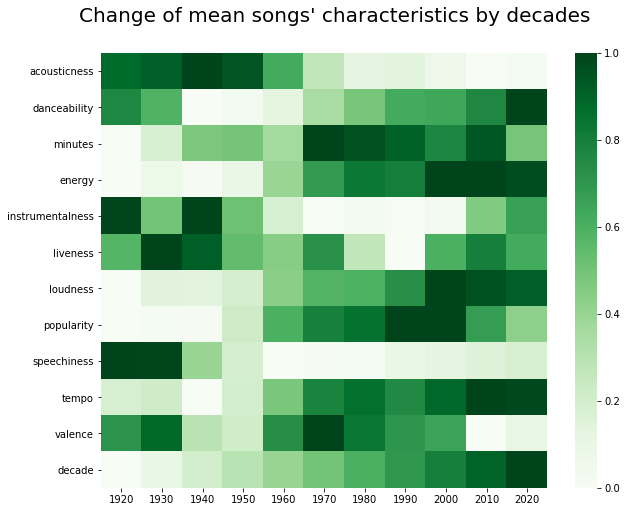

In [101]:
heatcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fff0d4", "#ffd27f", "#fb8e00"])

plt.figure(figsize=(10,8))
# значения имеют огромный размах, поэтому их надо нормализовать
norm_min = decades_means.iloc[:12,].sub(decades_means.iloc[:12,].min(axis=1), axis=0)
# https://jiffyclub.github.io/palettable/cubehelix/ палетка
cmp = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) 
# cmp2 = sns.cubehelix_palette(rot=-.4)
sns.heatmap(norm_min.div(norm_min.max(axis=1), axis=0), cmap='Greens')
plt.suptitle("Change of mean songs' characteristics by decades", fontsize=20, x=0.45, y=0.96)

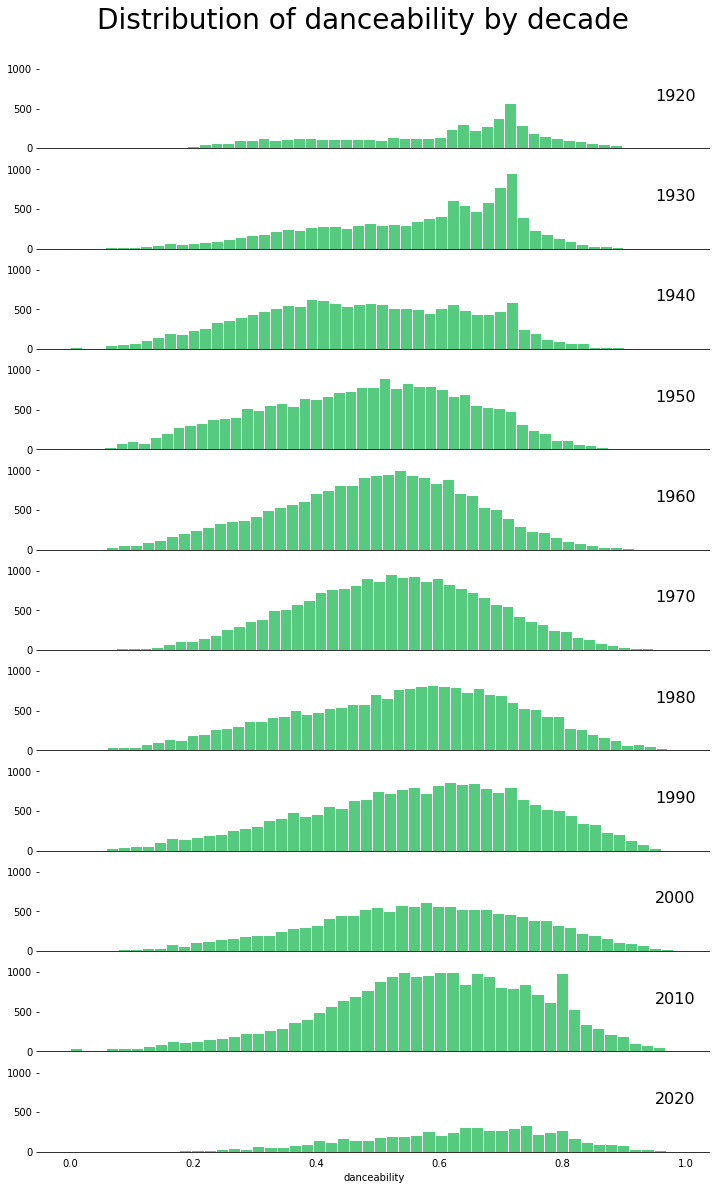

In [102]:
# feeling cute might delete later
fig, ax = plt.subplots(11, 1, figsize=(12,20), sharey = True, sharex = True)
n = 0
for i in decade['decade'].sort_values(ascending=True).unique():
    sns.histplot(data=decade[decade['decade'] == i]['danceability'], 
                 ax=ax[n], 
                 bins = 50, 
                 color='#1db954', 
                 edgecolor='white')
    ax[n].set_title(i, x = 0.95, y = 0.5, fontsize=16) 
    ax[n].set(ylabel=None)
    ax[n].tick_params(bottom=False)
    n+=1
fig.suptitle("Distribution of danceability by decade", fontsize=28, y=0.92)
sns.despine(left=True)
# ax[0].set(xlabel=None) 
# set(xticklabels=[])

Text(0.27, 1, 'Distribution of danceability by decade')

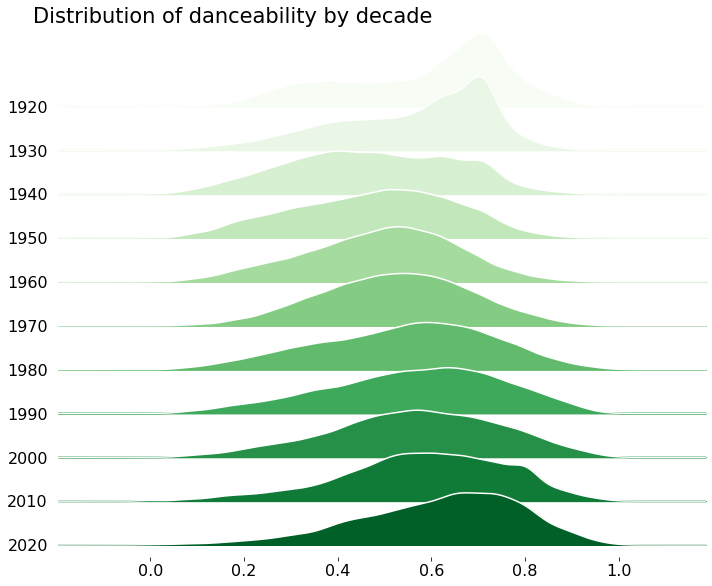

In [105]:
# хехек
greens_cmap = cm.get_cmap('Greens', 128) 
fig, ax = joyplot(figsize=(10, 8), 
                data=decade, 
                column='danceability', 
                by='decade', 
                colormap=greens_cmap, 
                linecolor='white', 
                ylabelsize=16, 
                xlabelsize=16)
plt.title("Distribution of danceability by decade", fontsize=21, color='k', x=0.27, y=1)

Text(1, 1, 'Distribution of song length by decade\n in minutes')

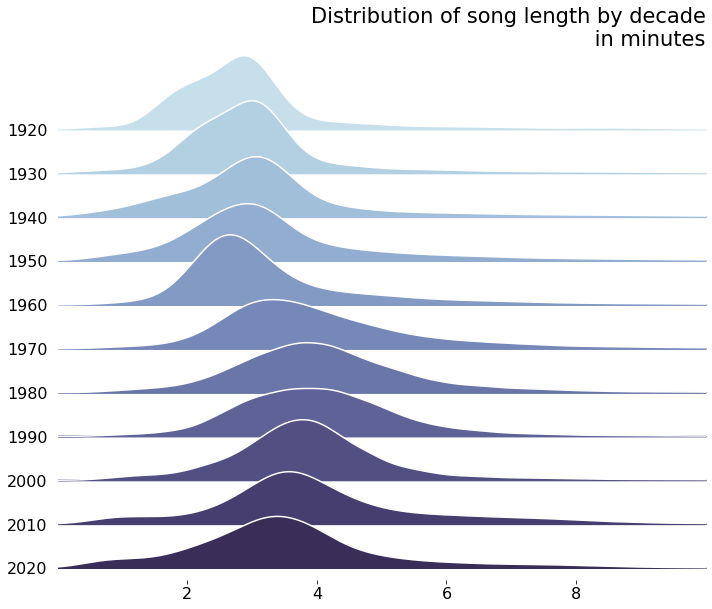

In [72]:
fig, ax = joyplot(data=decade, 
                  column=['minutes'], 
                  by='decade',  
                  colormap=cmp, 
                  linecolor='white', 
                  ylabelsize=16, 
                  xlabelsize=16, 
                  figsize=(10, 8), 
                  x_range=(0, 10))
plt.title("Distribution of song length by decade\n in minutes", fontsize=21, color='k', x=1, y=1, loc="right")

In [76]:
data_by_genres['genres']

0       21st century classical
1                        432hz
2                        8-bit
3                           []
4                   a cappella
                 ...          
3227          zim urban groove
3228                      zolo
3229                      zouk
3230              zurich indie
3231                    zydeco
Name: genres, Length: 3232, dtype: object

In [78]:
data_by_genres["genres"].nunique() # К сожалению основной датасет не имеет жанр а в остальных датасетах число песен сильно меньше ,чем в исходных данных
# В качестве решения мы можем классифицировать жанры, обучившись на маленьком датасете
# Будем использовать K-Means чтобы разметить 20 жанров


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

#Get the numerical data
X = data_by_genres.select_dtypes(np.number)

cluster_pipeline = Pipeline([("scaler", StandardScaler()), \
                             ("kmeans", KMeans(n_clusters=20))])
cluster_pipeline.fit(X)
data_by_genres["general_genre"] = cluster_pipeline.predict(X)

In [79]:

#This X is from df and the former X was from df_genre

X = data.select_dtypes(np.number)

#number_cols = list(X.columns)
cluster_pipeline.fit(X)
cluster_labels = cluster_pipeline.predict(X)
data['general_genre'] = cluster_labels

Построение рекомендательной системы:
We will build our recommendation system based on the genre we get and the distance from numerical features. The logics are:
Мы построим нашу собственную рекомендательную систему основанную на жанре 

1. Мы фильтруем песни по похожему жанру
2. Если там будет только 1 песня , мы вернём только эту песню
3. Если больше 1 , то мы выберем одну с наименьшим расстоянием



In [83]:
distance_cols = list(X.columns)
data[distance_cols] = data[distance_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data.drop_duplicates(subset="name", keep="first", inplace=True)



In [89]:
def get_recommendations(song_name, amount=1):
    # Данные о песне
    song_data = data[data["name"]==song_name]
    song_data = song_data.select_dtypes(np.number)
    genre = int(song_data["general_genre"])
    # Отбираем только те песни , которые имеют похожий жанр
    song_data.drop("general_genre", axis=1, inplace=True)
    # Убираем ту песню
    df_1 = data[data["name"]!=song_name]
    df_1 = df_1[df_1["general_genre"]==genre]
    #We create a df_2 so we can track the song name in df_1
    df_2=df_1[distance_cols]
    
    #Now we get the distance
    point_a = np.array(song_data)
    display(song_data)
    distance=[]
    for i in range(df_2.shape[0]):
        point_b = np.array(df_2.iloc[i])
        # считаем длинну раззности двух векторов
        song_distance = np.linalg.norm(point_a-point_b)
        # добавляем в список расстояний
        distance.append(song_distance)
    df_1["distance"]=distance
    df_1.sort_values(by="distance",ascending=True, inplace=True)
    df_1.reset_index(inplace=True)
    
    #Now we print out the song recommendation
    rec_song = df_1.loc[0:amount]
    print("Based on your preference, we recommend ")
    for i in range(amount):
        print(rec_song.loc[i]["name"] + " by "+rec_song.loc[i]["artists"])
        
#Lets try this out
get_recommendations("Keep A Song In Your Soul",10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,minutes,decade
0,0.99498,0.605263,0.030637,0.224,0.0,0.000522,0.454545,0.379,0.741868,0.0,0.12,0.096395,0.6159,0.634,0.0,0.045845,0.0


Based on your preference, we recommend 
Let's Do It (with Eddie Heywood & His Orchestra) - Take 1 by ['Billie Holiday', 'Eddie Heywood']
Did I Remember? - Take 1 by ['Billie Holiday']
Everybody's Laughing (with Teddy Wilson & His Orchestra) by ['Billie Holiday', 'Teddy Wilson']
Me, Myself and I - Take 2 by ['Billie Holiday']
La Entrerriana - Remasterizado by ['Ignacio Corsini']
La entrerriana - Instrumental (Remasterizado) by ['Francisco Canaro']
Bal Soi Bose Keno by ['Mantu Rani']
Parmukh Bani Tu Kamala by ['Vinayakrao Patwardhan']
Laughing at Life - Take 2 by ['Billie Holiday']
Dă-mi câte puțin din tot ce ai by ['Cristian Vasile']
